<a href="https://colab.research.google.com/github/JeongeunL/Boostcourse/blob/main/2_ML_with_Pima_Indians_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 강좌 보기 : https://www.edwith.org/boostcourse-ds-511

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### 1. 필요한 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. 데이터셋 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/부스트코스/data/"
df = pd.read_csv(PATH + "diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info() # 결측치 없고, 모두 숫자 데이터 --> 이 데이터는 전처리 필요 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3. 학습, 예측 데이터셋 나누기

In [ ]:
df.shape # 전체 데이터는 768개 행

(768, 9)

In [ ]:
int(df.shape[0] * 0.8) # 전체 데이터의 80% 위치에 해당하는 인덱스 값

614

> training dataset 나누기



In [ ]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy() # training data
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [ ]:
train.shape

(614, 9)

> test dataset 나누기


In [ ]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
test.shape

(154, 9)

### 4. 학습, 예측에 사용할 컬럼

In [ ]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
train.columns[:-1] # 'Outcome'컬럼을 제외한 모든 컬럼

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
# feature_names라는 변수에 학습과 예측에 사용할 컬럼명 가져옴
feature_names = train.columns[:-1].tolist()

### 5. 정답값이자 예측해야 될 값

In [ ]:
# label_name이라는 변수에 예측할 컬럼의 이름을 가져옴
label_name = train.columns[-1]
label_name

'Outcome'

In [ ]:
# Q. 왜 feature_names는 리스트 형태이고 label_name은 리스트가 아닌가?
# A. 이 데이터에서 예측할 값은 하나밖에 없기 때문

### 6. 학습, 예측 데이터셋 만들기

> training dataset 만들기

In [ ]:
# 학습 세트 만들기 (ex) 기출문제)
X_train = train[feature_names]

In [ ]:
# Q. 데이터를 랜덤하게 섞은 다음에 train/test 데이터셋을 만드는 게 더 좋지 않을까?
# (데이터가 편향될 수 있으니까)

In [ ]:
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# 정답 값 (ex) 기출문제의 정답)
y_train = train[label_name]

In [ ]:
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

> test dataset 만들기

In [ ]:
# 예측에 사용할 데이터셋 만들기 (ex) 실전 시험 문제)
X_test = test[feature_names]

In [ ]:
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [ ]:
# 예측의 정답값 (ex) 실전 시험 문제의 정답)
y_test = test[label_name]

In [ ]:
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 7. 머신러닝 알고리즘 가져오기
(여기에선 decision tree 기법 사용)

In [ ]:
## Decision tree는 분류, 회귀 둘 다 사용할 수 있다.

# 당뇨병일지/아닐지 예측: Classification
# 인슐린 수치 예측: Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

### 8. 학습(훈련)

In [ ]:
# 기출문제와 정답으로 공부하는 과정과 유사

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 9. 예측

In [ ]:
# 실전 시험문제의 정답을 직접 예측하는 과정과 유사

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

### 10. 트리 알고리즘 분석하기

In [ ]:
# decision tree를 시각화

In [ ]:
from sklearn.tree import plot_tree

#plot_tree(model, feature_names=feature_names)
# 이렇게 하면 텍스트로 나와서 보기 힘들다

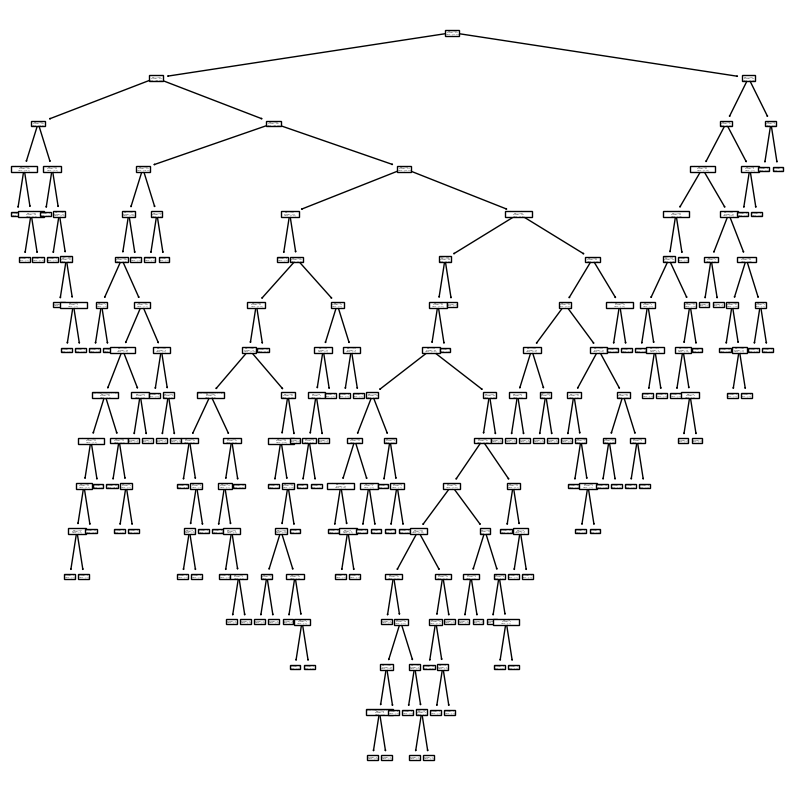

In [ ]:
plt.figure(figsize=(10, 10))
tree = plot_tree(model, feature_names=feature_names) # 여전히 보기 힘들다

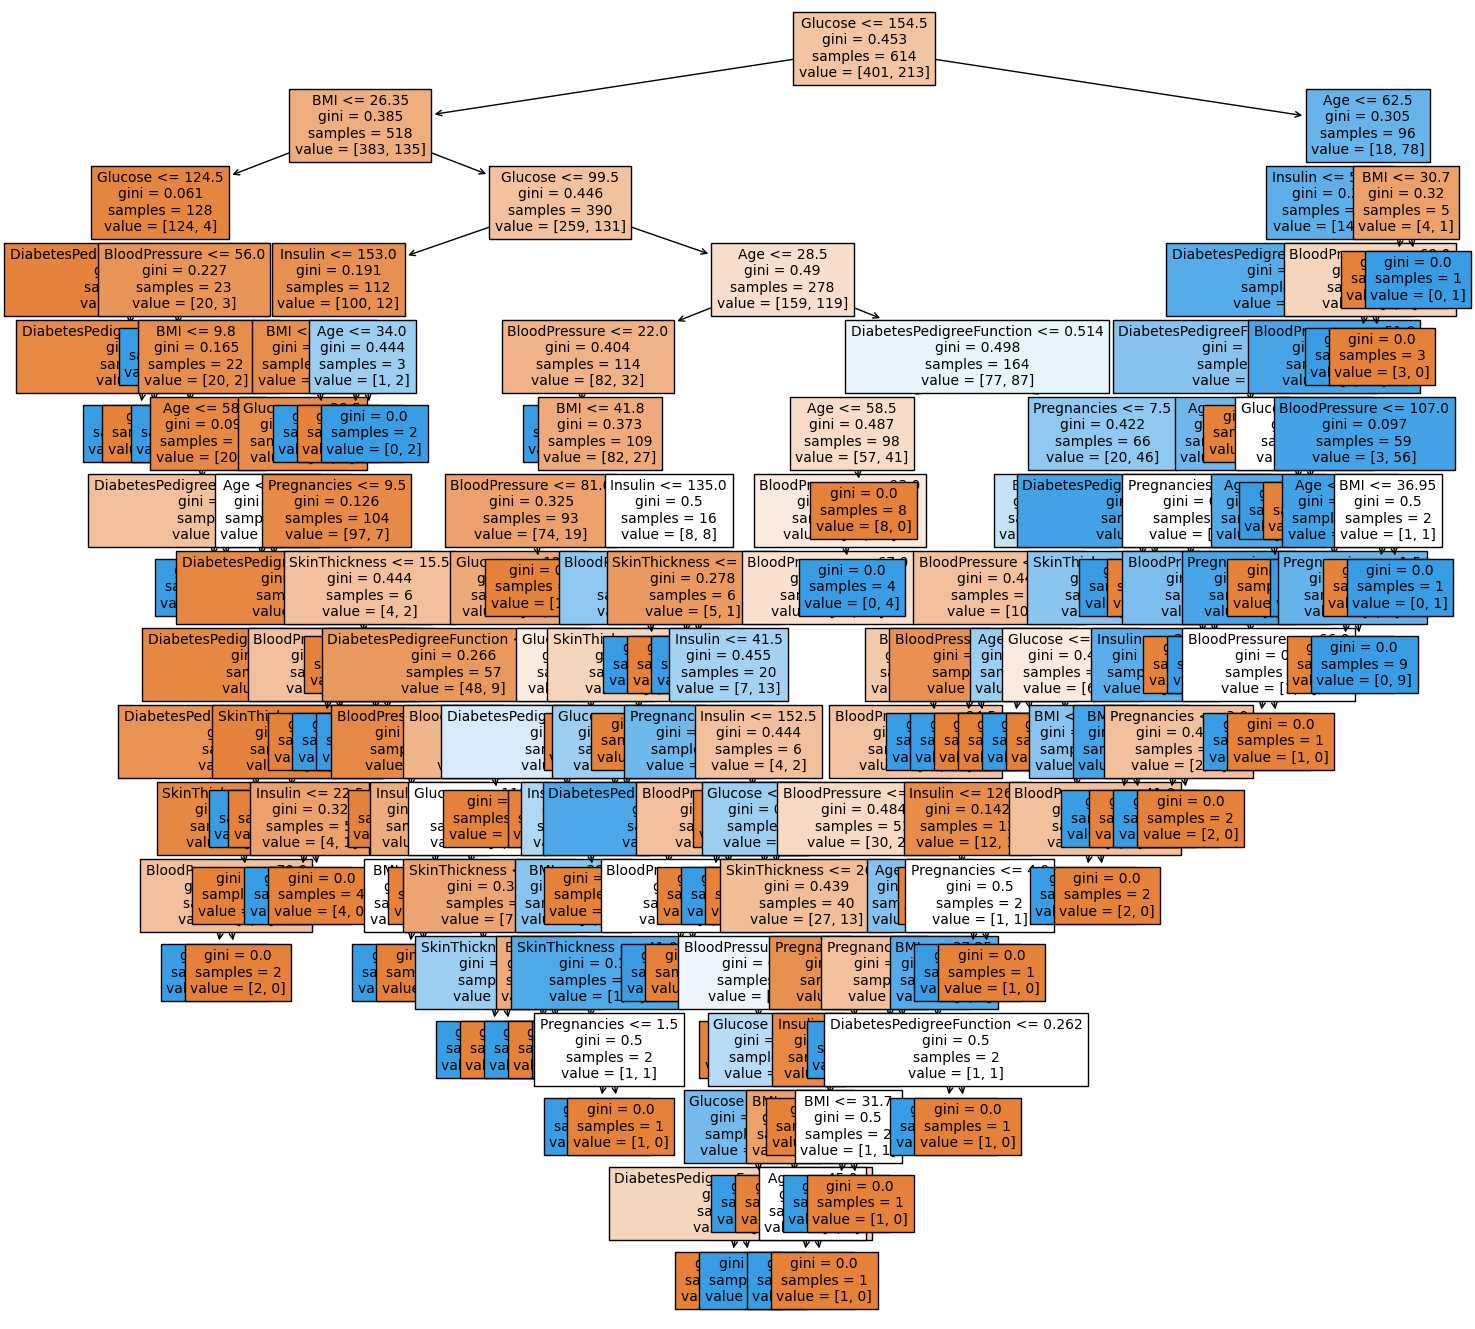

In [ ]:
plt.figure(figsize=(17, 17))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [ ]:
# graphviz를 통해 시각화
# graphviz는 별도의 설치 필요

In [ ]:
# 두 개 모두 설치해야 한다.
# 1) graphviz
# 2) graphviz를 사용할 수 있게 해주는 도구

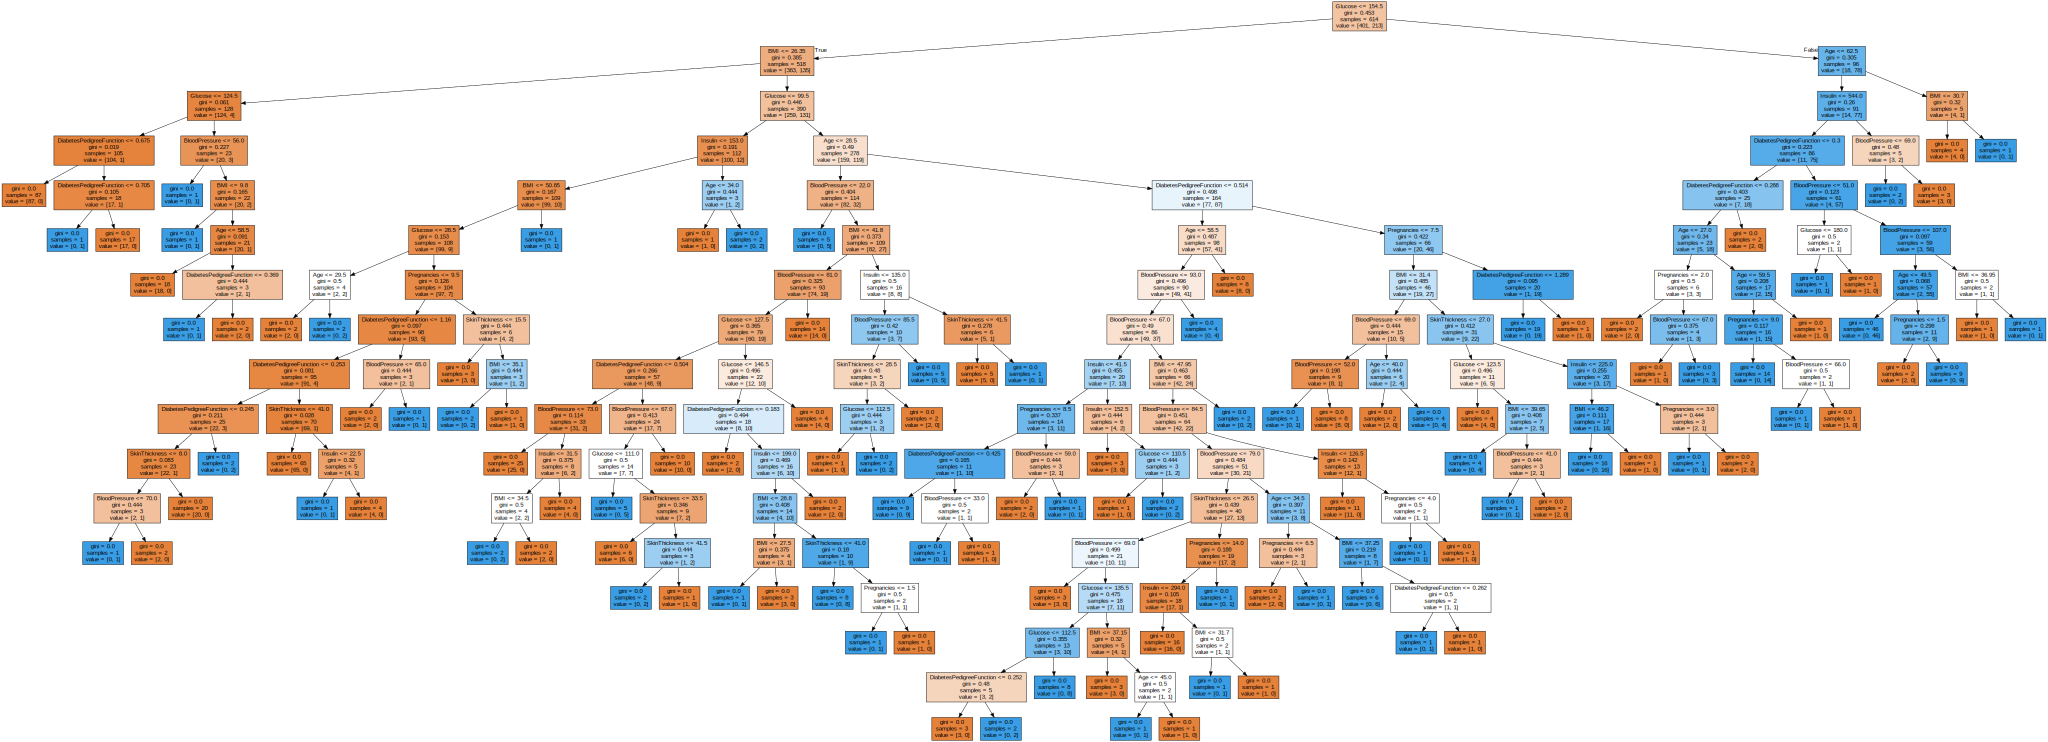

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

# 코랩에서 실행했기 때문에 설치 안 해도 됨

In [ ]:
# 트리 아래로 갈수록 sample이 줄어들고, gini=0이 되면 당뇨병인지/아닌지 예측
# overfitting을 방지하기 위해 트리의 깊이를 정하기도 함 (pruning)

In [ ]:
# 피처의 중요도를 추출
model.feature_importances_

array([0.06521101, 0.31376623, 0.15357093, 0.05263288, 0.06191954,
       0.15746663, 0.09555091, 0.09988187])

<Axes: >

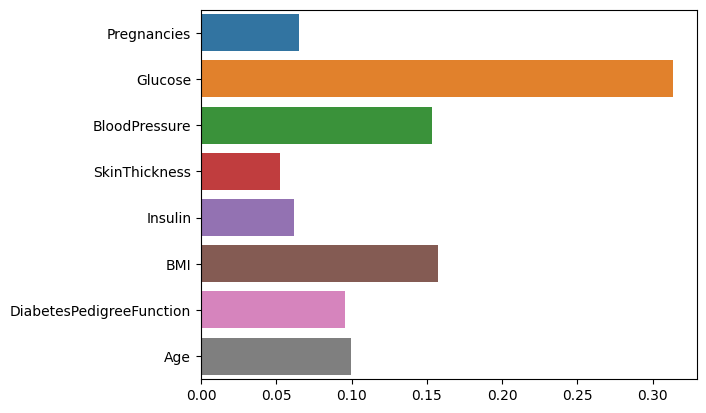

In [ ]:
# 피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
# Insulin이 중요한 피쳐일 것으로 생각했는데, 피쳐 중요도 시각화를 보니
# 그렇지 않은 것으로 나타났다.

# -> Insulin의 feature engineering 할 예정

### 11. 정확도(Accuracy) 측정하기

In [ ]:
y_predict # 예측값

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

> 다르게 예측한 값

In [ ]:
diff_count = abs(y_test - y_predict).sum() # 다르게 예측한 값의 개수
diff_count

39

In [ ]:
diff_ratio = abs(y_test - y_predict).sum() / len(y_test) # 잘못 예측한 값의 비율
diff_ratio

0.2532467532467532

> 정확히 예측한 값

In [ ]:
len(y_test) - diff_count # 맞춘 개수

115

In [ ]:
((len(y_test)-diff_count) / len(y_test)) # 예측의 정확도

0.7467532467532467

In [ ]:
# 1) 알고리즘을 이용하여 accuracy 구하기
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7467532467532467

In [ ]:
# 2) model의 score로 accuracy 계산 (정답 값을 알고 있을 때)
model.score(X_test, y_test)

0.7467532467532467

EDA를 통해 데이터를 정제하고, 어떤 피쳐를 사용할지 잘 결정하면 model의 정확도를 더 올릴 수 있다.